__Jokes Recommender System__

I intend to build a recommender system based on different methods and compare their results. I will base the recommender system on the Jester Dataset of joke ratings. I will test different algorithms, tuning hyperparameters while performing a simple train-test-validation-split. With these algorithms, I will determine the funniest and unfunniest jokes, as well as the persons with the greatest and the smallest senses of humor. 

__Dataset__

I used the "Jester Datasets for Recommender Systems and Collaborative Filtering Research" (Ken Goldberg, AUTOLab, UC Berkeley) Dataset 1, which contains 4.1 million anonymous ratings of jokes by users of the Jester Joke Recommender System Values from (-10.00 to +10.00) of 100 jokes from 73,421 users: collected between April 1999 - May 2003. I ended up using ratings from only the first ca. 1,000 of the possible 73,421 users. 

The first column (0) shows the number of jokes that were rated by users out of a possible 100 jokes. Columns 1-100 each reference a single joke. Users rated joke on a sclae from -10 to +10 with "99" indicating that the joke had not been rated by the corresponding user. 

In [6]:
import pandas as pd

df = pd.read_excel("jester-data-1.xls", header=None)
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


First off, I built a pipeline to format the data into something more useable. I downloaded the Jester Dataset, loaded it into a Pandas DataFrame, set the indexes of rows and columns to start at 1, trimmed all irrelevant information so that I was left with only the user item ratings matrix. I also decided to reduce the amount of data I was working with. Initially I did this to save time while testing my code, but I ended up using only a very limited amount of the original data.

In [7]:
import copy

df.index+=1
df.drop(df.columns[[0]], axis=1, inplace=True)

#reducing the dataset to a more managable amount
df = df.drop(df.index[1000:df.shape[0]])

df_original = copy.deepcopy(df)
df_original.head(10)


,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
1,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
2,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
3,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
4,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
5,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
6,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
7,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
8,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
9,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
10,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


Afterwards, I formatted the ratings into something useable for Surprise via the melt function, removed the latent ratings which had been set to "99" and loaded the dataset with rating scale from -10 to 10.

In [8]:
from surprise import Dataset, Reader

df.insert(loc=1, column="User ID", value= range(1,len(df.index)+1))
df = df.melt(id_vars="User ID", var_name="Joke ID", value_name='Rating')
df = df[df["Rating"] != 99.0]
df = df.sort_values(by=['User ID', 'Joke ID'])
df.head()

,User ID,Joke ID,Rating
0,1,1,-7.82
1000,1,2,8.79
2000,1,3,-9.66
3000,1,4,-8.16
4000,1,5,-7.52


In [9]:
reader = Reader(rating_scale=(-10, 10))
data = Dataset.load_from_df(df[['User ID', 'Joke ID', 'Rating']], reader)

Secondly, I tested the KNNBasic algorithm from the "Surprise" package using some basic hyperparameters and cross validated the results on the Jester data set with 10 folds. Aftewards, I did the same for a row of other algorithms (BaselineOnly, KNNWithMeans, KNNBaseline) and compared the results.

In [10]:
from surprise import KNNBasic, BaselineOnly, KNNWithMeans, KNNBaseline
from surprise.model_selection import cross_validate

trainset = data.build_full_trainset()
sim_options = {'name': 'cosine',
               'user_based': False
               }
algo = KNNBasic(sim_options=sim_options, k=2)
algo.fit(trainset)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean  

{'test_rmse': array([4.77267218, 4.68687983, 4.80045268, 4.77331162, 4.82224461,
        4.94055907, 4.78813284, 4.87754181, 4.81714301, 4.76693388]),
 'test_mae': array([3.4861743 , 3.45178316, 3.53171911, 3.51836513, 3.54591568,
        3.63812827, 3.53948998, 3.60059039, 3.54400759, 3.51150298]),
 'fit_time': (0.1157839298248291,
  0.11770987510681152,
  0.11944007873535156,
  0.11764907836914062,
  0.11933326721191406,
  0.11585283279418945,
  0.11606597900390625,
  0.11570978164672852,
  0.12270689010620117,
  0.11600184440612793),
 'test_time': (0.38517141342163086,
  0.3712959289550781,
  0.35927391052246094,
  0.36061596870422363,
  0.36705780029296875,
  0.3479151725769043,
  0.35404396057128906,
  0.5532352924346924,
  0.3435549736022949,
  0.3451838493347168)}

In [11]:
trainset = data.build_full_trainset()
algo = BaselineOnly()
algo.fit(trainset)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    4.3594  4.4134  4.3869  4.3570  4.3602  4.3370  4.3591  4.3594  4.3769  4.3377  4.3647  0.0216  
MAE (testset)     3.5021  3.5546  3.5160  3.4912  3.5122  3.4754  3.4812  3.5201  3.4880  3.4686  3.5009  0.0244  
Fit time          0.16    0.15    0.16    0.16    0.19    0.15    0.17    0.17    0.17    0.16    0.16    0.01    
Test time         0.03    0.03    0.03    0.03    0.11    0.03    0.03    0.03    0.03    0.03    0.04    0.03    


{'test_rmse': array([4.35937896, 4.41341676, 4.38688787, 4.35697472, 4.36021742,
        4.33697662, 4.35911727, 4.35940368, 4.37685875, 4.33769529]),
 'test_mae': array([3.50210396, 3.55455719, 3.51598763, 3.49124981, 3.51215918,
        3.47535988, 3.48120131, 3.52006948, 3.48803092, 3.46860788]),
 'fit_time': (0.15657806396484375,
  0.15082812309265137,
  0.16451573371887207,
  0.16340398788452148,
  0.1867358684539795,
  0.15021491050720215,
  0.16599297523498535,
  0.16540813446044922,
  0.16689419746398926,
  0.16442203521728516),
 'test_time': (0.026630163192749023,
  0.025989294052124023,
  0.026321887969970703,
  0.02794194221496582,
  0.11301207542419434,
  0.02609109878540039,
  0.02582097053527832,
  0.02631402015686035,
  0.027698993682861328,
  0.026736974716186523)}

In [12]:
trainset = data.build_full_trainset()
algo = KNNWithMeans()
algo.fit(trainset)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    

{'test_rmse': array([4.27059315, 4.28058296, 4.27347696, 4.22972957, 4.30102335,
        4.27608178, 4.30392071, 4.27422116, 4.23238717, 4.24474527]),
 'test_mae': array([3.3975111 , 3.39907051, 3.40224108, 3.37938771, 3.42973207,
        3.40148588, 3.43635387, 3.40590544, 3.35939298, 3.38644701]),
 'fit_time': (1.6668710708618164,
  1.8101310729980469,
  1.8550362586975098,
  1.6865410804748535,
  2.0466270446777344,
  2.0939321517944336,
  1.6346440315246582,
  1.6464409828186035,
  1.6270651817321777,
  1.6231989860534668),
 'test_time': (4.095531940460205,
  4.212285995483398,
  4.196300745010376,
  4.7318830490112305,
  5.067424058914185,
  3.9548559188842773,
  3.7573509216308594,
  3.7579550743103027,
  3.7683799266815186,
  3.7733099460601807)}

In [13]:
trainset = data.build_full_trainset()
algo = KNNBaseline()
algo.fit(trainset)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

{'test_rmse': array([4.26191988, 4.25865579, 4.24888677, 4.24736206, 4.22909283,
        4.2721381 , 4.25031903, 4.23764763, 4.33074113, 4.17613445]),
 'test_mae': array([3.41482144, 3.40077581, 3.37889695, 3.38142585, 3.35288176,
        3.38996284, 3.38493131, 3.36736528, 3.43057439, 3.31152914]),
 'fit_time': (1.7422358989715576,
  1.767307996749878,
  2.1568381786346436,
  1.7583730220794678,
  1.8225679397583008,
  1.7504000663757324,
  1.7488560676574707,
  1.7415530681610107,
  1.7503328323364258,
  1.7693729400634766),
 'test_time': (4.734467029571533,
  4.3709800243377686,
  4.746397972106934,
  4.2961578369140625,
  3.9467170238494873,
  3.9174001216888428,
  3.923715829849243,
  3.9344279766082764,
  3.9872870445251465,
  3.922631025314331)}

Thirdly, I used the SVD and CoClustering algorithms and cross validated again. I decided to finetune these two algorithms hyperparamters as they were giving me good initial results. I used the GridSearch function and plugged in several possible hyperparameters including but not limited to number of clusters per item/user, number of epochs and learning rate. GridSearch then recommended the hyperparameters with the most accurate results. 

In [14]:
from surprise import CoClustering
from surprise.model_selection import GridSearchCV

param_grid = {'n_cltr_u': [3,5,7], 'n_cltr_i': [3,5,7], 'n_epochs': [5, 10, 20, 30]}
gs = GridSearchCV(CoClustering, param_grid, measures=['rmse', 'mae'], cv=10)
gs.fit(data)
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])
algo = gs.best_estimator['rmse']
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

4.29850268884474
{'n_cltr_u': 3, 'n_cltr_i': 7, 'n_epochs': 30}
Evaluating RMSE, MAE of algorithm CoClustering on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    4.3074  4.3564  4.3042  4.2810  4.3280  4.3328  4.3171  4.2434  4.2674  4.2803  4.3018  0.0322  
MAE (testset)     3.4283  3.4677  3.4216  3.4060  3.4399  3.4577  3.4271  3.3629  3.3773  3.4058  3.4194  0.0311  
Fit time          2.74    2.93    2.90    2.26    2.24    2.21    2.21    2.20    2.20    2.21    2.41    0.30    
Test time         0.04    0.04    0.03    0.09    0.03    0.03    0.03    0.03    0.03    0.03    0.04    0.02    


{'test_rmse': array([4.30743949, 4.35643828, 4.30415169, 4.28097605, 4.32800298,
        4.33283248, 4.3170679 , 4.24339851, 4.26736202, 4.28026983]),
 'test_mae': array([3.42827709, 3.46771206, 3.4215617 , 3.40603393, 3.43994881,
        3.45771261, 3.42712733, 3.36294358, 3.37728189, 3.40581188]),
 'fit_time': (2.738109827041626,
  2.930408000946045,
  2.896474838256836,
  2.2599430084228516,
  2.2408833503723145,
  2.2144277095794678,
  2.2131459712982178,
  2.198125123977661,
  2.1978671550750732,
  2.207042694091797),
 'test_time': (0.041815996170043945,
  0.04148125648498535,
  0.030310869216918945,
  0.08971118927001953,
  0.029116153717041016,
  0.029048919677734375,
  0.029588937759399414,
  0.029009103775024414,
  0.029526948928833008,
  0.029246091842651367)}

In [15]:
from surprise import SVD

param_grid = {'n_epochs': [5, 10, 20, 30], 'lr_all': [.0025, .005, .001, .01, 0.05]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=10)
gs.fit(data)
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])
algo = gs.best_estimator['rmse']
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)


4.116656182761882
{'n_epochs': 20, 'lr_all': 0.001}
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    4.0799  4.0758  4.0744  4.1304  4.1338  4.1154  4.0948  4.1704  4.0975  4.1828  4.1155  0.0366  
MAE (testset)     3.2073  3.1868  3.1789  3.2265  3.2153  3.2331  3.1976  3.2497  3.1767  3.2680  3.2140  0.0290  
Fit time          4.38    5.20    4.28    4.63    4.51    4.63    4.25    4.06    4.42    6.98    4.73    0.80    
Test time         0.08    0.05    0.05    0.05    0.04    0.05    0.04    0.04    0.05    0.06    0.05    0.01    


{'test_rmse': array([4.07992283, 4.07584282, 4.07444115, 4.13040595, 4.13384305,
        4.11538316, 4.09479402, 4.17038209, 4.09749196, 4.18278782]),
 'test_mae': array([3.20729241, 3.18677376, 3.17887703, 3.2264932 , 3.21527004,
        3.23312528, 3.19758522, 3.24972154, 3.17667016, 3.26795026]),
 'fit_time': (4.379618167877197,
  5.2047247886657715,
  4.279184818267822,
  4.632666110992432,
  4.5108747482299805,
  4.631516933441162,
  4.254560947418213,
  4.062072038650513,
  4.416054010391235,
  6.9783570766448975),
 'test_time': (0.07578802108764648,
  0.049576759338378906,
  0.04973483085632324,
  0.05411195755004883,
  0.04413580894470215,
  0.05255317687988281,
  0.04287004470825195,
  0.04327201843261719,
  0.04559898376464844,
  0.05598187446594238)}

Fourthly, and after deciding to use the SVD algorithm to predict the latent scores I was missing, I used the hyperparameters suggested by GridSearch, split the data into a training and test sets, fit the algorithm to the training set, predicted ratings and received RMSE accuracy scores from the test set. 

In [16]:
from surprise import accuracy
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.2)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)
predictions_df_SVD = pd.DataFrame(predictions, columns=['userID', 'jokeID', 'rui', 'est', 'details'])
print(predictions_df_SVD[['userID', 'jokeID', 'rui', 'est']])

RMSE: 4.1617
       userID  jokeID   rui       est
0         826      16 -1.31 -2.407020
1         411      54  2.57  3.114270
2         911      53  0.73  1.418093
3         429       8  0.63  0.139804
4         853      33  6.99 -0.369478
...       ...     ...   ...       ...
14130     824      15  5.68  1.985805
14131     789      39 -0.53  2.887012
14132     701      23  7.57  1.587354
14133     160      16  6.70  0.758047
14134     940      86  3.83  3.120421

[14135 rows x 4 columns]


I also filled the latent matrix with all the missing scores predicted by the tuned SVD algorithm.

In [17]:
def fill_pred_matrix(df, algo):
    for row in range(1, df.shape[0]+1):
        for column in range(1, df.shape[1]+1):
            if df.loc[row][column] == 99:
                pred = algo.predict(row, column, verbose=False)
                df.loc[row][column] = round(pred.est,2)
    return df

print(fill_pred_matrix(copy.deepcopy(df_original), algo))

       1     2     3     4     5     6     7     8     9     10   ...   91   \
1    -7.82  8.79 -9.66 -8.16 -7.52 -8.50 -9.85  4.17 -8.98 -4.76  ...  2.82   
2     4.08 -0.29  6.36  4.37 -2.38 -9.66 -0.73 -5.34  8.88  9.22  ...  2.82   
3     6.53  5.74  7.63  3.29  9.03  9.27  9.03  9.27  5.20  8.04  ...  5.38   
4    -0.77  8.35  0.97  0.68  1.80  8.16 -2.82  6.21 -0.16  1.84  ...  1.67   
5     8.50  4.61 -4.17 -5.39  1.36  1.60  7.04  4.61 -0.44  5.73  ...  5.19   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
996   1.94 -5.53  5.19 -5.49 -4.08 -2.52  3.20  3.83 -6.02  2.96  ... -4.42   
997   4.27  0.39  5.39 -5.63 -3.59  5.58  1.17 -8.16 -5.87 -6.70  ...  1.35   
998   5.58  5.63  4.85 -3.11  3.40 -1.26  3.54  2.14 -4.66  0.78  ...  1.35   
999  -7.33 -6.55 -7.33 -7.33 -1.60 -3.35 -7.14 -6.60 -7.33 -6.07  ... -7.18   
1000 -1.12  0.73 -1.84 -1.50  2.52  1.07  3.50  0.97  2.28  0.68  ...  2.76   

       92    93    94    95    96    97    98    99

Finally, I calculated the best and worst predictions (least/most amount of error between prediction and actual rating) made by the algorithm and found the user who was predicted to give the highest amount of overall scores (Mr./Mrs./Ms. Giggles) as well as the user predicted to give the lowest amount of overall scores (Mr./Mrs./Ms. FrownyFace). Most importantly I calculated which joke was predicted to have been the funniest and the least funny, had all users rated all jokes. And so, I am one step closer to finding the funniest joke in the world.

In [18]:
predictions_df_SVD['error'] = abs(predictions_df_SVD.est - predictions_df_SVD.rui)

best_predictions = predictions_df_SVD.sort_values(by='error')[:10]
print("Best Predictions SVD: ")
print(best_predictions[['userID', 'jokeID', 'rui', 'est', 'error']])


Best Predictions SVD: 
       userID  jokeID   rui       est     error
7750      356      59  2.43  2.430405  0.000405
6378      322      73  4.08  4.080701  0.000701
9587      457      59 -2.33 -2.329127  0.000873
9528      462      53  2.62  2.619125  0.000875
11720     389       4  2.33  2.330919  0.000919
8121      208      37  3.11  3.111063  0.001063
10890     715       7  0.53  0.531165  0.001165
5916      223       1  1.41  1.408666  0.001334
2186      203      61  2.52  2.518431  0.001569
7290      329       5  3.06  3.061650  0.001650


In [19]:
worst_predictions = predictions_df_SVD.sort_values(by='error')[-10:]
print("Worst Predictions SVD: ")
print(worst_predictions[['userID', 'jokeID', 'rui', 'est', 'error']])

Worst Predictions SVD: 
       userID  jokeID   rui       est      error
10348     986      41 -9.47  5.689997  15.159997
7573      593      56 -9.90  5.850416  15.750416
3852      210      38 -7.23  8.695350  15.925350
7156        5      32 -9.47  6.772304  16.242304
6561      691      53 -8.74  7.734933  16.474933
4067      407      97 -8.54  7.979980  16.519980
14016     986      89 -9.76  7.659538  17.419538
13650     407      47 -9.47  8.133979  17.603979
13082     463      32 -9.22  8.865513  18.085513
12692     639      27 -9.90  8.355171  18.255171


In [20]:
pred_matrix_SVD = fill_pred_matrix(copy.deepcopy(df_original), algo)

column_sums = pred_matrix_SVD.sum(axis=0)
column_sums = pd.DataFrame(column_sums).iloc[:, 0]
print("Average rating for the funniest joke (Nr. " +str(column_sums.idxmax())+ "): " +str(column_sums.max()/1000))
print("Average rating for the unfunniest joke (Nr. " +str(column_sums.idxmin())+ "): "+str(column_sums.min()/1000))

Average rating for the funniest joke (Nr. 89): 4.03785
Average rating for the unfunniest joke (Nr. 58): -3.7161099999999996


In [21]:
row_sums = pred_matrix_SVD.sum(axis=1)
row_sums = pd.DataFrame(row_sums).iloc[:, 0]
print("User " +str(row_sums.idxmax())+ " is Mr./Mrs./Ms. Giggles with an average rating of: " +str(row_sums.max()/100))
print("User " +str(row_sums.idxmin())+ " is Mr./Mrs./Ms. Frownyface with an average rating of: " +str(row_sums.min()/100))

User 616 is Mr./Mrs./Ms. Giggles with an average rating of: 7.557699999999998
User 673 is Mr./Mrs./Ms. Frownyface with an average rating of: -6.341


For comparison, I did the same with the KNNBasic algorithm.

In [22]:
sim_options = {'name': 'cosine',
               'user_based': False
               }
algo = KNNBasic(sim_options=sim_options, k=2)
trainset, testset = train_test_split(data, test_size=0.2)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)
predictions_df_KNNBasic = pd.DataFrame(predictions, columns=['userID', 'jokeID', 'rui', 'est', 'details'])
print(predictions_df_KNNBasic[['userID', 'jokeID', 'rui', 'est']])
print(fill_pred_matrix(copy.deepcopy(df_original), algo))


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.7553
       userID  jokeID   rui       est
0         158      45 -3.74 -3.750000
1         473      29  5.34  5.096125
2         856      26  4.76  4.669918
3         842      18  2.43  1.045787
4         939      84  0.63 -0.249993
...       ...     ...   ...       ...
14130     388      35  8.98  7.990305
14131     112      37 -0.87  6.156183
14132     527       2  9.08  7.733649
14133     429       4 -0.10  0.265535
14134     678      11  2.72 -1.085688

[14135 rows x 4 columns]
       1     2     3     4     5     6     7     8     9     10   ...   91   \
1    -7.82  8.79 -9.66 -8.16 -7.52 -8.50 -9.85  4.17 -8.98 -4.76  ...  2.82   
2     4.08 -0.29  6.36  4.37 -2.38 -9.66 -0.73 -5.34  8.88  9.22  ...  2.82   
3     7.25  7.35  7.43  7.70  9.03  9.27  9.03  9.27  8.76  8.34  ...  7.28   
4    -3.14  8.35  7.02  7.53  1.80  8.16 -2.82  6.21 -0.85  1.84  ... -0.80   
5     8.50  4.61 -4.17 -5.39  1.36

In [23]:
predictions_df_KNNBasic['error'] = abs(predictions_df_KNNBasic.est - predictions_df_KNNBasic.rui)

best_predictions = predictions_df_KNNBasic.sort_values(by='error')[:10]
print(best_predictions[['userID', 'jokeID', 'rui', 'est', 'error']])

       userID  jokeID   rui   est  error
10137     136      78  8.83  8.83    0.0
9433      436      10 -0.29 -0.29    0.0
10496     606      16 -6.21 -6.21    0.0
5892      616      98  9.03  9.03    0.0
5905      439      35  6.17  6.17    0.0
2021      864      55 -9.37 -9.37    0.0
8423      797      77  7.57  7.57    0.0
8506        3      53  7.28  7.28    0.0
10567     292      79  4.27  4.27    0.0
3903       65      70 -0.29 -0.29    0.0


In [24]:
worst_predictions = predictions_df_KNNBasic.sort_values(by='error')[-10:]
print("Worst Predictions KNNBasic: ")
print(worst_predictions[['userID', 'jokeID', 'rui', 'est', 'error']])

Worst Predictions KNNBasic: 
       userID  jokeID   rui       est      error
3713      536      35 -9.32  8.740000  18.060000
13557     293      54 -9.51  8.571301  18.081301
10905     308      20 -9.81  8.311276  18.121276
1940      350      25 -9.37  8.785746  18.155746
7485      226      19  9.03 -9.300579  18.330579
2896      593      29 -9.61  8.835826  18.445826
9829      683      39  8.74 -9.710000  18.450000
3168      154      90 -9.76  8.857622  18.617622
13159      74       5 -9.32  9.322178  18.642178
12790     504      62 -9.71  8.954892  18.664892


In [25]:
pred_matrix_KNNBasic = fill_pred_matrix(copy.deepcopy(df_original), algo)
column_sums = pred_matrix_KNNBasic.sum(axis=0)
column_sums = pd.DataFrame(column_sums).iloc[:, 0]
print("Average rating for the funniest joke (Nr. " +str(column_sums.idxmax())+ "): " +str(column_sums.max()/1000))
print("Average rating for the unfunniest joke (Nr. " +str(column_sums.idxmin())+ "): "+str(column_sums.min()/1000))

Average rating for the funniest joke (Nr. 50): 3.9547299999999996
Average rating for the unfunniest joke (Nr. 16): -2.93321


In [26]:
row_sums = pred_matrix_KNNBasic.sum(axis=1)
row_sums = pd.DataFrame(row_sums).iloc[:, 0]
print("User " +str(row_sums.idxmax())+ " is Mr./Mrs./Ms. Giggles with an average rating of: " +str(row_sums.max()/100))
print("User " +str(row_sums.idxmin())+ " is Mr./Mrs./Ms. Frownyface with an average rating of: " +str(row_sums.min()/100))

User 468 is Mr./Mrs./Ms. Giggles with an average rating of: 7.701099999999996
User 183 is Mr./Mrs./Ms. Frownyface with an average rating of: -6.973500000000001


Considering that I really only used a fraction of the available data, I think that the finetuned SVD algorithm generally gives a good impression of what may have been scored by particular users. It isn't extremely accurate, but more of a ballpark figure which tends to predict correctly if something would have been negatively or positively rated. 

Generally speaking, I was very happy with the best prediction results. Jokes were being rated on a scale from -10 to 10 and the best predictions for SVD had an error far below 0.01 (for 100x1000 matrix). Unfortunately, the worst predictions were extremely far off the mark (up to 17.5). In contrast, the KNNBasicm algorithm (k = 2) had a far lower margin of error for the best predictions but an even higher error for the worst predictions, over 19, which seems incredibly high considering the rating scale only has a range of 20. In general, I assume that the SVD algorithm gives more reliable predictions than the KNNBasic algorithm, especially if it has been finetuned and the sparsity in the dataset is higher. In this case the unrated cells accounted for ca. 30% of the dataset. 


Something that surprised me was that the error rate seems to grow exponentially. I am still unsure how to explain this. I was expecting something more linear, although I have no way to explain why I had this expectation. 

I was also surprised by the fact, that both algorithms predicted user 32's behaviour extremely similarly as one can see in the visualization "Prediction User 32 SVD/KNNBasic".



__Visualizations__

I visualized the development of the prediction errors for the SVD and KNNBasic algorithms from best to worst.

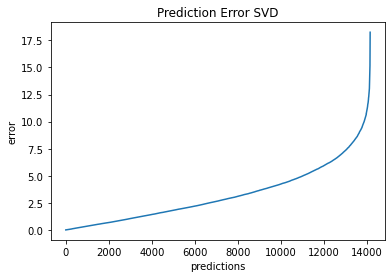

In [27]:
import matplotlib.pyplot as plt

x = list(range(0,len(predictions_df_SVD)))
y = sorted(predictions_df_SVD[['error']]['error'].tolist())
plt.plot(x, y)
plt.xlabel('predictions')
plt.ylabel('error')
plt.title('Prediction Error SVD')
plt.show("svg")

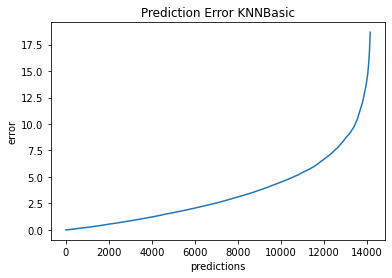

In [28]:
x = list(range(0,len(predictions_df_KNNBasic)))
y = sorted(predictions_df_KNNBasic[['error']]['error'].tolist())
plt.plot(x, y)
plt.xlabel('predictions')
plt.ylabel('error')
plt.title('Prediction Error KNNBasic')
plt.show("svg")

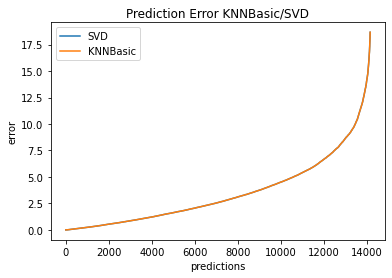

In [29]:
x1 = list(range(0,len(predictions_df_SVD)))
x2 = list(range(0,len(predictions_df_KNNBasic)))
y = sorted(predictions_df_KNNBasic[['error']]['error'].tolist())
plt.plot(x1, y, label = "SVD")
plt.plot(x2, y, label = "KNNBasic")
plt.xlabel('predictions')
plt.ylabel('error')
plt.title('Prediction Error KNNBasic/SVD')
plt.legend()
plt.show("svg")

I also decided to visualize the ratings of users 29 and 32 who had both scored a total of 54 jokes each. As one can see, user 32 was far more extreme in his/her judgement, especially negatively. Both users did not rate a large amount of jokes between 50 and 100. The visualization shows how the algorithm predicted very different behaviours for these users.

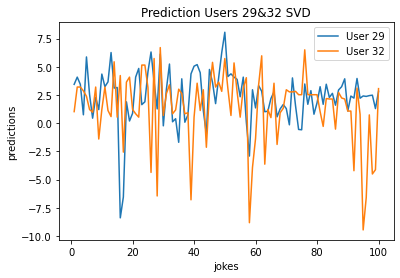

In [30]:
x = list(range(1,101))
y1 = pred_matrix_SVD.iloc[29]
y2 = pred_matrix_SVD.iloc[32]
plt.xlabel('jokes')
plt.ylabel('predictions')
plt.title('Prediction Users 29&32 SVD')
plt.plot(x, y1, label = "User 29")
plt.plot(x, y2, label = "User 32")
plt.legend()
plt.show("svg")

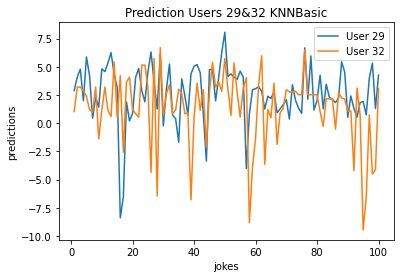

In [31]:
x = list(range(1,101))
y1 = pred_matrix_KNNBasic.iloc[29]
y2 = pred_matrix_KNNBasic.iloc[32]
plt.xlabel('jokes')
plt.ylabel('predictions')
plt.title('Prediction Users 29&32 KNNBasic')
plt.plot(x, y1, label = "User 29")
plt.plot(x, y2, label = "User 32")
plt.legend()
plt.show("svg")

I then compared the user 29's and 32's ratings by SVD and KNNBasic.

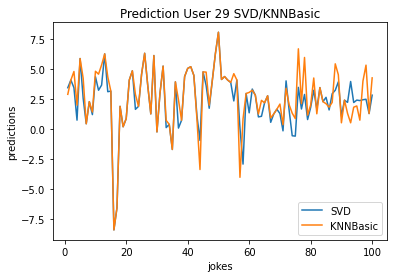

In [32]:
x = list(range(1,101))
y1 = pred_matrix_SVD.iloc[29]
y2 = pred_matrix_KNNBasic.iloc[29]
plt.xlabel('jokes')
plt.ylabel('predictions')
plt.title('Prediction User 29 SVD/KNNBasic')
plt.plot(x, y1, label = "SVD")
plt.plot(x, y2, label = "KNNBasic")
plt.legend()
plt.show("svg")

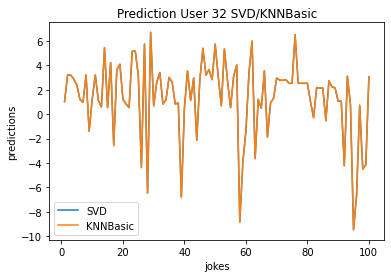

In [33]:
x = list(range(1,101))
y1 = pred_matrix_SVD.iloc[32]
y2 = pred_matrix_KNNBasic.iloc[32]
plt.xlabel('jokes')
plt.ylabel('predictions')
plt.title('Prediction User 32 SVD/KNNBasic')
plt.plot(x, y1, label = "SVD")
plt.plot(x, y2, label = "KNNBasic")
plt.legend()
plt.show("svg")